In [1]:
import pickle
import matplotlib.pyplot as plt

import numpy as np
import os
import seaborn as sns
from aux_fcn import session
##############################################
# Si se quieren guardar las figuras y donde. Si no se quiere guardar se queda cada figura en pantalla hasta que se pulse una tecla


# De donde se sacan los datos para comparar
Model='XGBOOST\\'
Data_folder="Compilation\\"
##############################################

Root='C:\Septiembre-Octubre\Model-Optimization\\'+Model+Data_folder+'Validation'

# Load data (deserialize)
Model=[]
Codes=[]
for filename in os.listdir(Root):
    print(filename)
    Codes.append(filename[8:])
    f = os.path.join(Root, filename)
    # checking if it is a file
    with open(f, 'rb') as handle:
        Model.append(pickle.load(handle))
##################################################3
############################################  
n_sessions=21
session_names=[]
for s in range(n_sessions):
    session_names.append(session[s])
print(session_names)

n_models=len(Codes)
prec_means=[]
rec_means=[]
F1_means=[]
th_arrays=[]
# Para la matriz de calor
F1_max=np.empty(shape=(n_models,n_sessions))
F1_max_plot=np.empty(shape=(n_models,n_sessions,3))

for n in range(n_models):
    print(Codes[n])
    performance=np.nan_to_num(Model[n]['Performance'])
    n_sessions,n_th,j=np.shape(performance)
    th_arr=performance[0,:,1]
    prec_arr=np.empty(shape=(n_sessions,n_th))
    rec_arr=np.empty(shape=(n_sessions,n_th))
    F1_arr=np.empty(shape=(n_sessions,n_th))
    # Solo hay un array de ths
    for i in range(n_sessions):
        prec_arr[i]=performance[i,:,2]
        rec_arr[i]=performance[i,:,3]
        F1_arr[i]=performance[i,:,4]
        F1_max[n][i]=max(performance[i,:,4])
        F1_max_plot[n][i]=performance[i,np.argmax(performance[i,:,4]),2:]

    prec_means.append(np.mean(prec_arr,axis=0))
    rec_means.append(np.mean(rec_arr,axis=0))
    F1_means.append(np.mean(F1_arr,axis=0))
    th_arrays.append(th_arr)
            



Results_Ch8_W60_Ts001_D3_lr0.10_g0.00_l00_scale1.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.00_L01_SCALE3.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.00_L10_SCALE1.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.00_L10_SCALE3.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.25_L00_SCALE1.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.25_L01_SCALE3.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.25_L10_SCALE1.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G0.25_L10_SCALE3.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G1.00_L00_SCALE1.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G1.00_L01_SCALE3.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G1.00_L10_SCALE1.val
Results_Ch8_W60_Ts001_D3_Lr0.10_G1.00_L10_SCALE3.val
Results_Ch8_W60_Ts001_D4_Lr0.05_G1.00_L01_SCALE1.val
Results_Ch8_W60_Ts001_D4_Lr0.05_G1.00_L01_SCALE3.val
Results_Ch8_W60_Ts001_D4_Lr0.05_G1.00_L10_SCALE1.val
Results_Ch8_W60_Ts001_D4_Lr0.05_G1.00_L10_SCALE3.val
['Dlx1_1', 'Thy7_1', 'PV6', 'PV7xChR2_1', 'Thy9_1', 'Thy1GCam1_1', 'Thy7_2', 'Thy7_3', 'Thy1GCam1_2', 'Thy1GCam1_3', 'Thy1GCam1_4', 'Thy1GCam1_5', 'Thy1

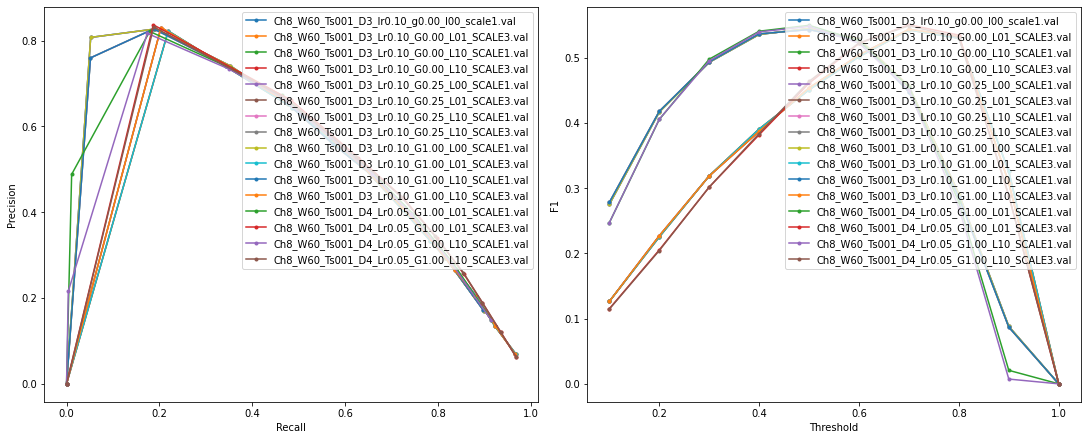

In [2]:
# Plot de P y R, F1 y umbral
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(15, 6))
inc=1.0/n_models
for i in range(n_models):
    axs[0].plot(rec_means[i],prec_means[i],'-',marker='.')#,c=str(i*inc))
    axs[1].plot(th_arrays[i],F1_means[i],'-',marker='.')#,c=str(i*inc))

axs[0].set(xlabel="Recall",ylabel="Precision")
axs[1].set(xlabel="Threshold",ylabel="F1")
axs[0].legend(Codes,fontsize=10,loc='upper right')
axs[1].legend(Codes,fontsize=10,loc='upper right')



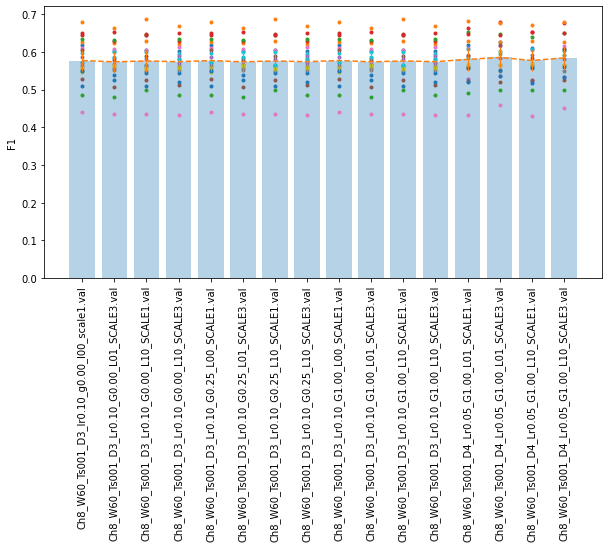

In [3]:
# Mean of models
F1_mod_means=np.mean(F1_max,axis=1)
F1_mod_stdev=np.std(F1_max,axis=1)
X=np.linspace(0,n_models-1,n_models,dtype=int)
plt.figure(figsize=(10,5))
for j in range(n_sessions):
    plt.plot(X,F1_max[:,j],'.')
plt.bar(X,F1_mod_means,alpha=0.33)
plt.errorbar(X,F1_mod_means,F1_mod_stdev/2,linestyle='--',elinewidth=1)
plt.ylabel("F1")
plt.xticks(X,Codes,rotation='vertical')

plt.show()





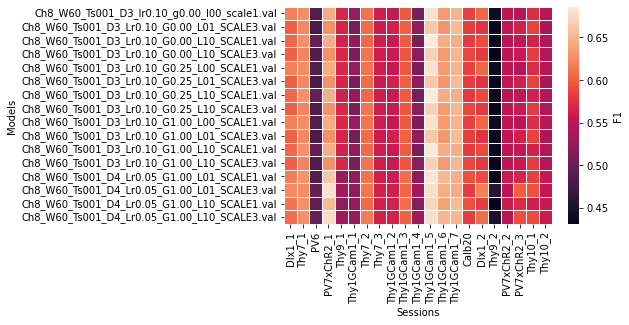

In [4]:
# HeatMap
F1_mat=np.empty(shape=(n_models,n_sessions))
for j in range(n_models):
    for i in range(n_sessions):
        F1_mat[j][i]=F1_max[j,i]
ax = sns.heatmap(F1_mat, linewidth=0.5,cbar_kws={'label': 'F1'})
ax.set(xlabel='Sessions', ylabel='Models')
ax.set_yticklabels(Codes,rotation=0)
ax.set_xticklabels(session_names,rotation=90)
plt.show()

In [37]:
performance=np.nan_to_num(Model[0]['Performance'])